## **Competition Overview**

The main objective of this project is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal by using different aspects of the buildings. The data is from the drivendata.org competition: "Richter's Predictor: Modeling Earthquake Damage." The micro-averaged F1 score was the metric used for this project, and I was able to achieve 0.7273 as the best score by fine-tuning a random forest model.

<img src="https://s3.amazonaws.com/drivendata-public-assets/nepal-quake-bm-2.JPG" width="500">

The data was collected through surveys by the Central Bureau of Statistics that work under the National Planning Commission Secretariat of Nepal. This survey is one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

## **Import Libraries**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.metrics import f1_score as score #Scoring metric for the competition
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
sns.set_palette("Set2")
sns.set_style("ticks")

## **Import Data**

In [2]:
train_labels = pd.read_csv("train_labels.csv")
train_values = pd.read_csv("train_values.csv")
test_values = pd.read_csv("test_values.csv")

# **Exploratory Data Analysis**

Our main objectives for any Exploratory Data Analysis should be the following:
* Check for missing values
* Know the data type of each variable
* Observe the distribution of the data
* Identify and deal with outliers
* Make relevant conclusions about the data

In [3]:
print("# Train Values: {}".format(train_values.shape))
print("# Train Labels: {}".format(train_labels.shape))
print("# Test Values: {}".format(test_values.shape))

# Train Values: (260601, 39)
# Train Labels: (260601, 2)
# Test Values: (86868, 39)


In [4]:
train_labels.head()

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3

In [5]:
train_values.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type roof_type ground_floor_type  \
0                      t               r         n                 f   
1                      o               r         n                 x   
2                      t               r         n                 f   
3                      t               r         n                 f   
4                      t               r         n                 f   

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0                q        t                  d                             1   
1                q        s                  d                             0   
2                x        t                  d                             0   
3                x        s                  d                             0   
4                x        s                  d                             1   

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                    1                              0   
1                                    1                              0   
2                                    1                              0   
3                                    1                              0   
4                                    0                              0   

   has_superstructure_cement_mortar_stone  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       0                          1   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          1                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

  legal_ownership_status  count_families  has_secondary_use  \
0                 

In [6]:
test_values.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       300051              17             596           11307   
1        99355               6             141           11987   
2       890251              22              19           10044   
3       745817              26              39             633   
4       421793              17             289            7970   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    3   20                7                  6   
1                    2   25               13                  5   
2                    2    5                4                  5   
3                    1    0               19                  3   
4                    3   15                8                  7   

  land_surface_condition foundation_type roof_type ground_floor_type  \
0                      t               r         n                 f   
1                      t               r         n                 f   
2                      t               r         n                 f   
3                      t               r         x                 v   
4                      t               r         q                 f   

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0                q        s                  d                             0   
1                q        s                  d                             0   
2                q        s                  d                             0   
3                j        t                  d                             0   
4                q        t                  d                             0   

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                    1                              0   
1                                    1                              0   
2                                    1                              0   
3                                    0                              0   
4                                    1                              0   

   has_superstructure_cement_mortar_stone  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       1                          0   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          0                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

  legal_ownership_status  count_families  has_secondary_use  \
0                 

## **Missing Values**

In [7]:
train_values.isnull().sum() * 100 / len(train_values)

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

In [8]:
train_labels.isnull().sum() * 100 / len(train_values)

building_id     0.0
damage_grade    0.0
dtype: float64

In [9]:
test_values.isnull().sum() * 100 / len(train_values)

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

The dataset looks very clean and we don't seem to have any missing data.

## **Data Types**

In [10]:
train_values.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [11]:
train_labels.dtypes

building_id     int64
damage_grade    int64
dtype: object

In [12]:
test_values.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

## **Data Distribution**

Let's start by taking a look at how balanced our datasets really is.

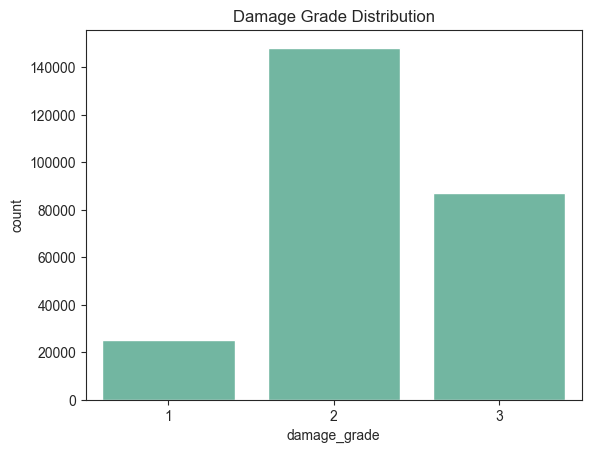

In [13]:
sns.countplot(x="damage_grade", data=train_labels)
plt.title("Damage Grade Distribution")
plt.show()

From the previous plot, it is easy to see that our dataset is very imbalanced. The reason why this dataset is imbalanced could be due to the fact that the data was collected after the 2015 Nepal's Earthquake, and it is very likely that the damage grade of the buildings is highly correlated to the intensity of the earthquake. It is important to mention that decision trees and random forests are extremely sensitive to imbalanced data. 

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(train_values["count_floors_pre_eq"], hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("# of Floors Before Earthquake")
plt.xticks(rotation=90)
plt.title("# of Floors Before Earthquake Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 1200x600 with 0 Axes>

There are buildings in the dataset with up to 9 floors, but the majority of the affect had only 2.

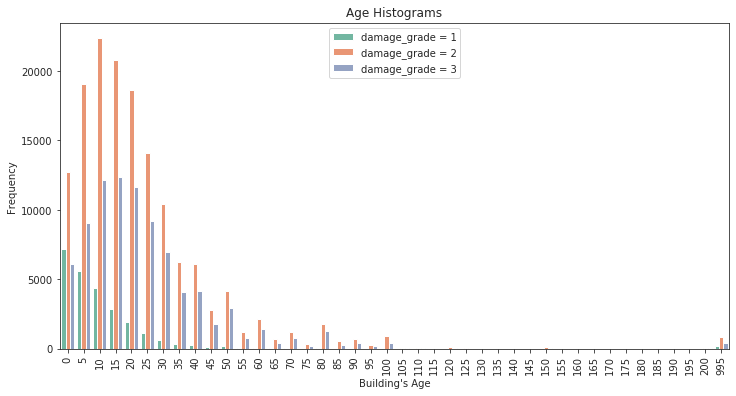

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_values["age"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Building's Age")
plt.xticks(rotation=90)
plt.title("Age Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

We have buildings around 995 years old, which at first glance seems like a error in the collection of data. After a quick Google search, I was able to determine that buildings in Nepal can be that old. Nevertheless, we still have to deal with the outliers.

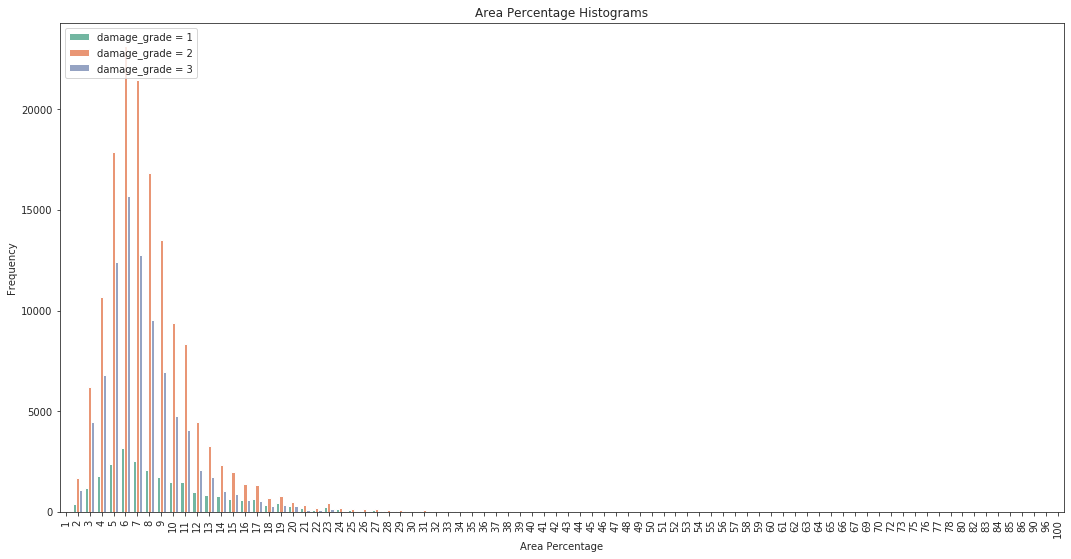

In [ ]:
plt.figure(figsize=(18,9))
sns.countplot(x=train_values["area_percentage"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Area Percentage")
plt.xticks(rotation=90)
plt.title("Area Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

The normalized area of the building footprint is less than 20% for most buildings. It is important to mention that some values go up to 100%, so it is important for us to take care of the outliers of this feature.

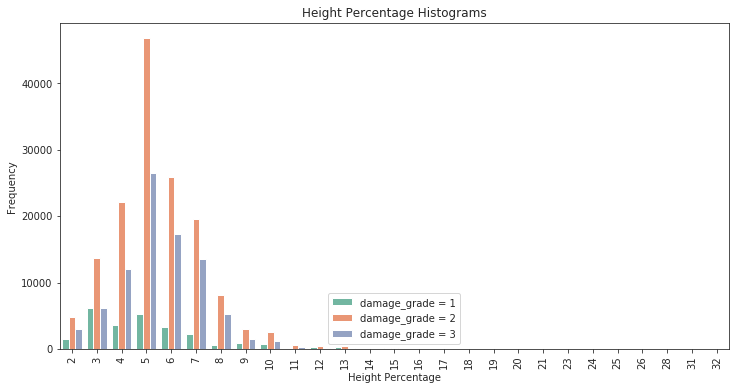

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_values["height_percentage"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Height Percentage")
plt.xticks(rotation=90)
plt.title("Height Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

Once again, we have another variable that needs to have its outliers removed. Most of the data for this feature is less than 10%, but we have some buildings with values up to 32%.

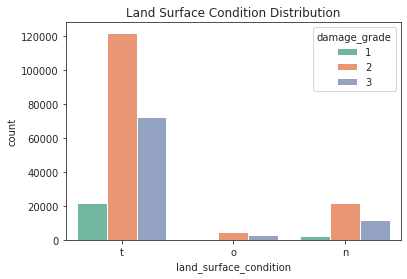

In [ ]:
sns.countplot(x = train_values["land_surface_condition"], hue = train_labels["damage_grade"])
plt.title("Land Surface Condition Distribution")
plt.show()

This is a categorical variable that indicates the surface condition of the land where the building was built. Possible values: n, o, t.

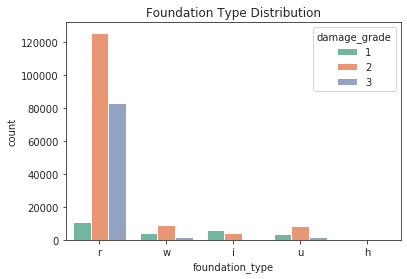

In [ ]:
sns.countplot(x = train_values["foundation_type"], hue = train_labels["damage_grade"])
plt.title("Foundation Type Distribution")
plt.show()

This is a categorical variable that indicates the type of foundation used while building. Possible values: h, i, r, u, w.

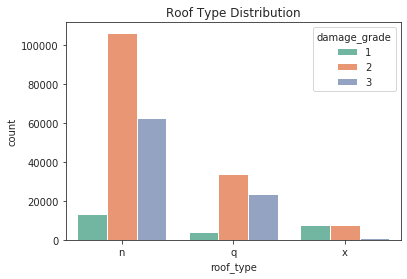

In [ ]:
sns.countplot(x = train_values["roof_type"], hue = train_labels["damage_grade"])
plt.title("Roof Type Distribution")
plt.show()

This is a categorical variable that indicates the type of roof used while building. Possible values: n, q, x

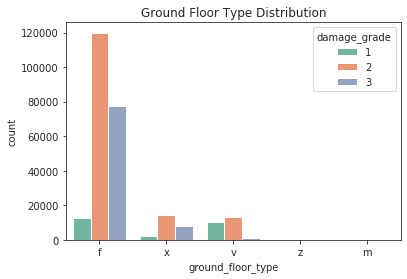

In [ ]:
sns.countplot(x = train_values["ground_floor_type"], hue = train_labels["damage_grade"])
plt.title("Ground Floor Type Distribution")
plt.show()

This is a categorical variable that indicates the type of the ground floor. Possible values: f, m, v, x, z.

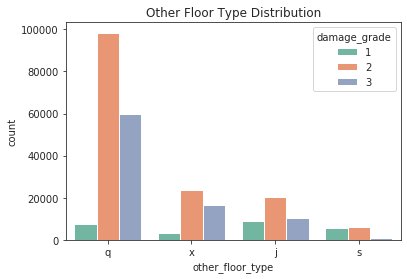

In [ ]:
sns.countplot(x = train_values["other_floor_type"], hue = train_labels["damage_grade"])
plt.title("Other Floor Type Distribution")
plt.show()

This is a categorical variable that indicates the type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.

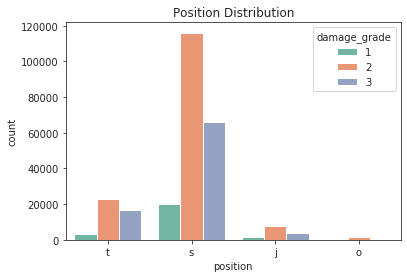

In [ ]:
sns.countplot(x = train_values["position"], hue = train_labels["damage_grade"])
plt.title("Position Distribution")
plt.show()

This is a categorical variable that indicates the position of the building. Possible values: j, o, s, t.

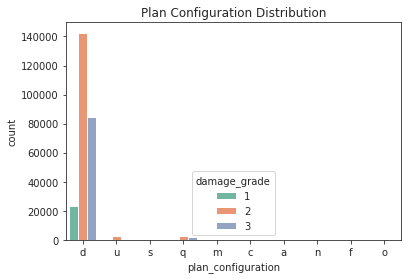

In [ ]:
sns.countplot(x = train_values["plan_configuration"], hue = train_labels["damage_grade"])
plt.title("Plan Configuration Distribution")
plt.show()

This is a categorical variable that indicates the building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

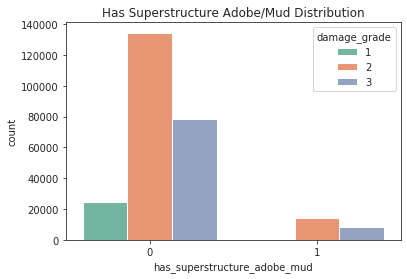

In [ ]:
sns.countplot(x = train_values["has_superstructure_adobe_mud"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Adobe/Mud Distribution")
plt.show()

This is a flag variable that indicates if the superstructure was made of Adobe/Mud.

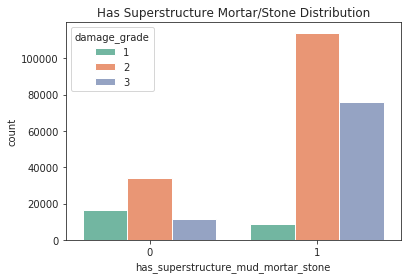

In [ ]:
sns.countplot(x = train_values["has_superstructure_mud_mortar_stone"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Mortar/Stone Distribution")
plt.show()

This is a flag variable that indicates if the superstructure was made of Mud Mortar - Stone.

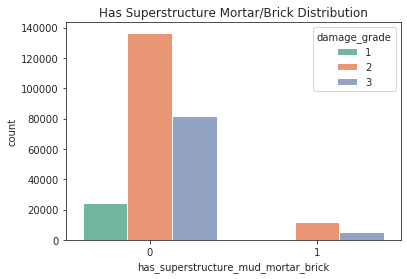

In [ ]:
sns.countplot(x = train_values["has_superstructure_mud_mortar_brick"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Mortar/Brick Distribution")
plt.show()

In [ ]:
plt.title("Has Superstructure Mortar/Brick Distribution")
plt.show()

This is a flag variable that indicates if the superstructure was made of Mud Mortar - Brick.

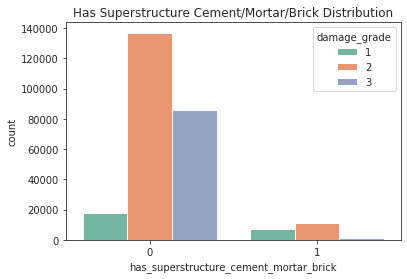

In [ ]:
sns.countplot(x = train_values["has_superstructure_cement_mortar_brick"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Cement/Mortar/Brick Distribution")
plt.show()

This is a flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

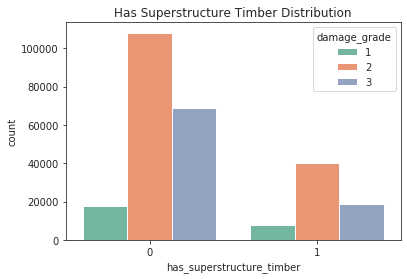

In [ ]:
sns.countplot(x = train_values["has_superstructure_timber"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Timber Distribution")
plt.show()

This is a flag variable that indicates if the superstructure was made of Timber.

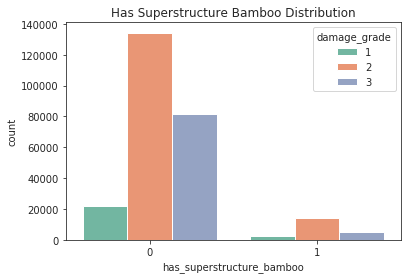

In [ ]:
sns.countplot(x = train_values["has_superstructure_bamboo"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Bamboo Distribution")
plt.show()

This is a flag variable that indicates if the superstructure was made of Bamboo.

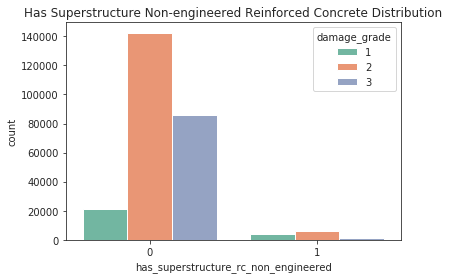

In [ ]:
sns.countplot(x = train_values["has_superstructure_rc_non_engineered"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Non-engineered Reinforced Concrete Distribution")
plt.show()

This is a flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.

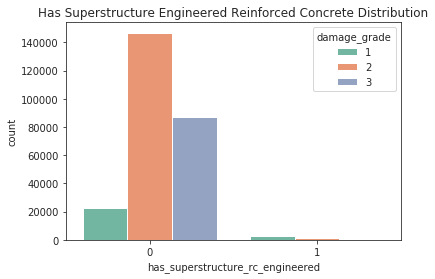

In [ ]:
sns.countplot(x = train_values["has_superstructure_rc_engineered"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Engineered Reinforced Concrete Distribution")
plt.show()

This is a flag variable that indicates if the superstructure was made of engineered reinforced concrete.

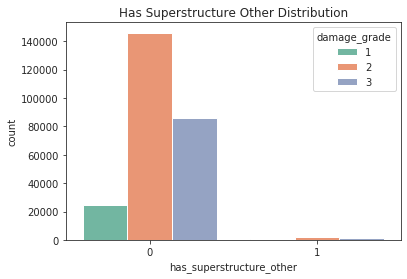

In [ ]:
sns.countplot(x = train_values["has_superstructure_other"], hue = train_labels["damage_grade"])
plt.title("Has Superstructure Other Distribution")
plt.show()

This is a flag variable that indicates if the superstructure was made of any other material.

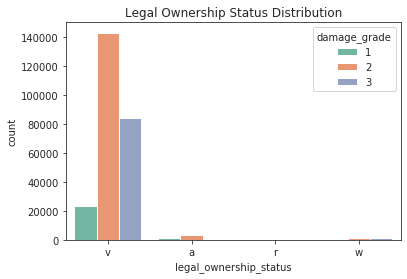

In [ ]:
sns.countplot(x = train_values["legal_ownership_status"], hue = train_labels["damage_grade"])
plt.title("Legal Ownership Status Distribution")
plt.show()

This is a categorical variable that indicates the legal ownership status of the land where building was built. Possible values: a, r, v, w.

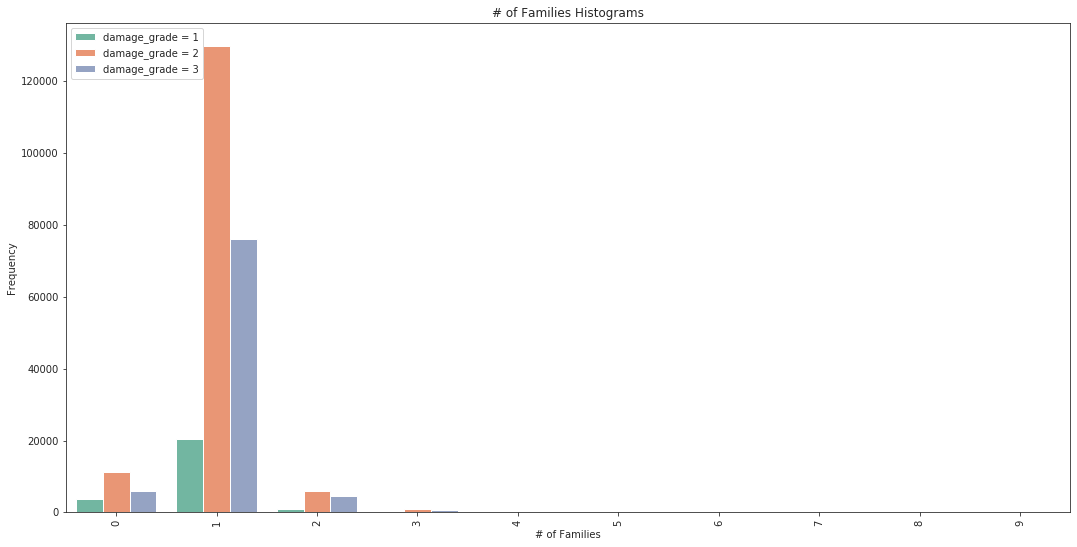

In [ ]:
plt.figure(figsize=(18,9))
sns.countplot(x=train_values["count_families"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("# of Families")
plt.xticks(rotation=90)
plt.title("# of Families Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

Most of the buildings had only 1 familiy living in them. We also have buildings were up to 9 families were living in, this buildings could be the same as those buildings with 9 floors. 

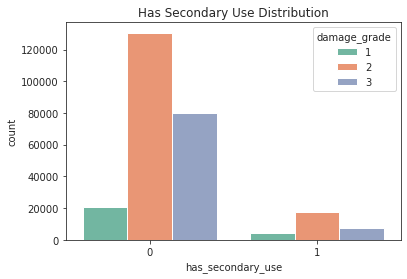

In [ ]:
sns.countplot(x = train_values["has_secondary_use"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Distribution")
plt.show()

This is a flag variable that indicates if the building was used for any secondary purpose.

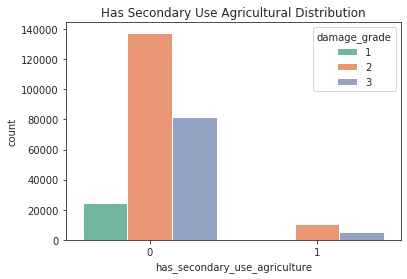

In [ ]:
sns.countplot(x = train_values["has_secondary_use_agriculture"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Agricultural Distribution")
plt.show()

This is a flag variable that indicates if the building was used for agricultural purposes.

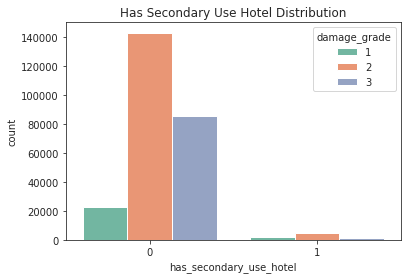

In [ ]:
sns.countplot(x = train_values["has_secondary_use_hotel"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Hotel Distribution")
plt.show()

This is a flag variable that indicates if the building was used as a hotel.

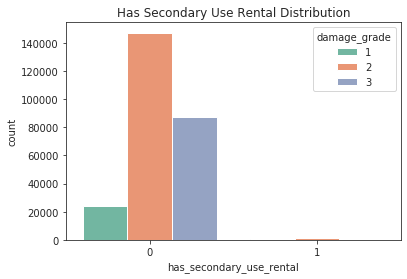

In [ ]:
sns.countplot(x = train_values["has_secondary_use_rental"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Rental Distribution")
plt.show()

This is a flag variable that indicates if the building was used for rental purposes.

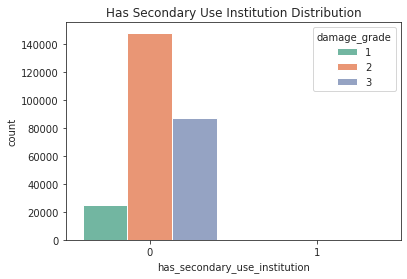

In [ ]:
sns.countplot(x = train_values["has_secondary_use_institution"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Institution Distribution")
plt.show()

This is a flag variable that indicates if the building was used as a location of any institution.

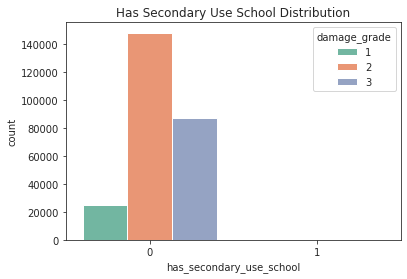

In [ ]:
sns.countplot(x = train_values["has_secondary_use_school"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use School Distribution")
plt.show()

This is a flag variable that indicates if the building was used as a school.

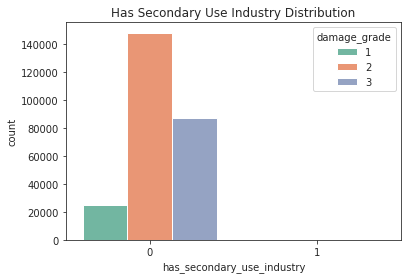

In [ ]:
sns.countplot(x = train_values["has_secondary_use_industry"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Industry Distribution")
plt.show()

This is a flag variable that indicates if the building was used for industrial purposes.

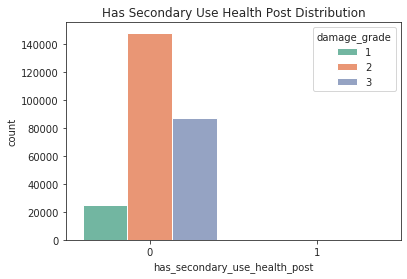

In [ ]:
sns.countplot(x = train_values["has_secondary_use_health_post"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Health Post Distribution")
plt.show()

This is a flag variable that indicates if the building was used as a health post.

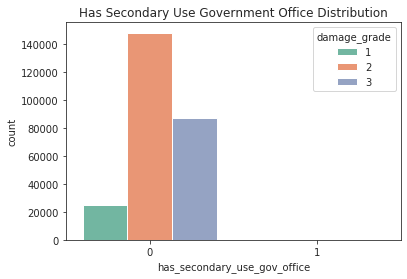

In [ ]:
sns.countplot(x = train_values["has_secondary_use_gov_office"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Government Office Distribution")
plt.show()

This is a flag variable that indicates if the building was used fas a government office.

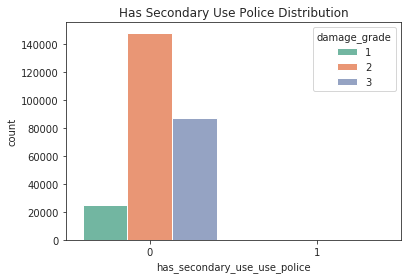

In [ ]:
sns.countplot(x = train_values["has_secondary_use_use_police"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Police Distribution")
plt.show()

This is a flag variable that indicates if the building was used as a police station.

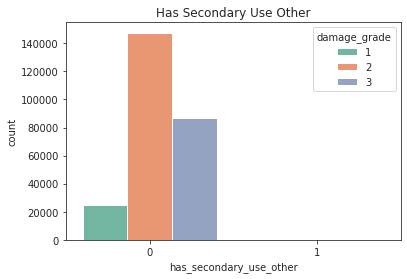

In [ ]:
sns.countplot(x = train_values["has_secondary_use_other"], hue = train_labels["damage_grade"])
plt.title("Has Secondary Use Other")
plt.show()

This is a flag variable that indicates if the building was secondarily used for other purposes.

## **Outliers**

Random Forests are a machine learning model based on decision trees, which are believed to perform strong even when the data contains outliers. However, this is a common misconception...

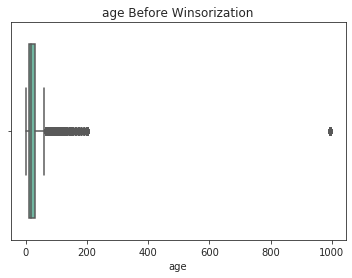

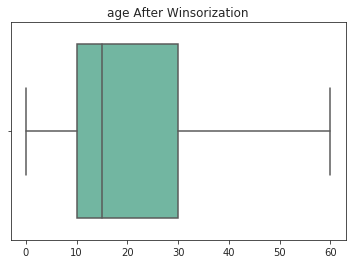

In [ ]:
#Data source
name = "age"
data = train_values[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.05))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_values[name] = winsorized_data

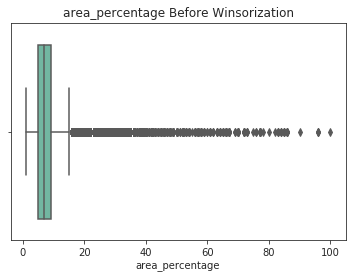

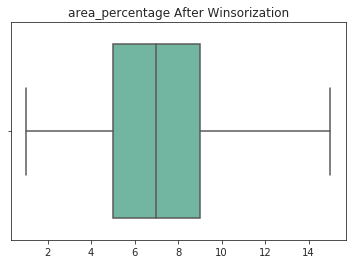

In [ ]:
#Data source
name = "area_percentage"
data = train_values[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.055))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_values[name] = winsorized_data

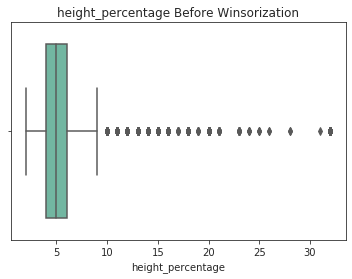

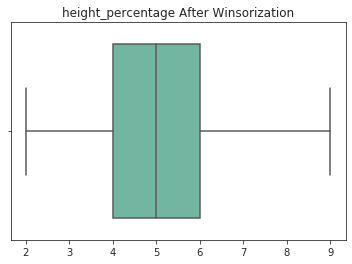

In [ ]:
#Data source
name = "height_percentage"
data = train_values[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.04))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
train_values[name] = winsorized_data

## **Correlations**

In [ ]:
train_values.drop(columns=["building_id"], inplace=True)
train_labels.drop(columns=["building_id"], inplace=True)

In [ ]:
train_values = pd.get_dummies(train_values, drop_first = True)

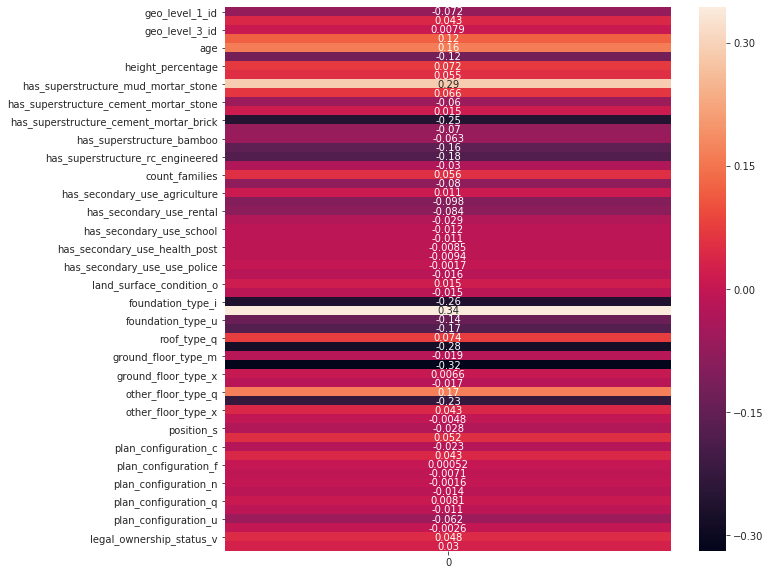

In [ ]:
plt.figure(figsize=(10,10))
correlations = train_values.corrwith(train_labels["damage_grade"])
sns.heatmap(pd.DataFrame(correlations), annot=True)
plt.show()

## **Decision Tree vs. Random Forest**

As it was previously mentioned, our dataset is very imbalanced and mainly contains *damage_grade = 2* values. Random forests and decision trees are highly sensitive to outliers, so fixing this issue should be a priority. RandomForestClassifier has a setting that let us deal with class imbalances named "class_weight." By setting class_weight = "balanced", the classes will be automatically weighted inversely proportional to the frequency in which they appear in the dataset. After some trial and error I determined that class_weight = "balanced" will no yield as good results as class_weight = None, because it is very likely that the test data is imbalanced as well.

Let's now compare the score of a single decision tree against that of a random forest. For both models, I'll use the best parameters previously obtained through GridSearchCV (ran in my own machine to speed up the process). I'll use the module time to compare if the added complexity and extra calculation time of the random forest is justified by a better score.

In [ ]:
X = train_values
y = train_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Decision Tree
dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = dt.fit(X_train, y_train)
dt_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(X_test)
dt_time_pred = time.time() - start_time
print("Decision Tree")
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Training Score: {}".format(dt.score(X_train, y_train)))
print("Test Score: {}".format(dt.score(X_test, y_test)))
print("----------------------------------------")

#Random Forest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = rf.fit(X_train, y_train)
rf_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(X_test)
rf_time_pred = time.time() - start_time
print("Random Forest")
print("Fit Time: {} seconds".format(rf_time_fit))
print("Prediction Time: {} seconds".format(rf_time_pred))
print("Training Score: {}".format(rf.score(X_train, y_train)))
print("Test Score: {}".format(rf.score(X_test, y_test)))



Decision Tree
Fit Time: 2.2999162673950195 seconds
Prediction Time: 0.027507781982421875 seconds
Training Score: 0.748661742133538
Test Score: 0.7168895454807084
----------------------------------------
Random Forest
Fit Time: 138.4948742389679 seconds
Prediction Time: 1.281522274017334 seconds
Training Score: 0.7549932847275518
Test Score: 0.7307994858118608


The random forest model took 7x more to be trained and 5x more to make predictions when compared to the single decision tree. The random forest performed better, but no significantly better than a single decision tree. In this scenario, 18 extra seconds of training time is not a big deal for us.

## **Confusion Matrix**

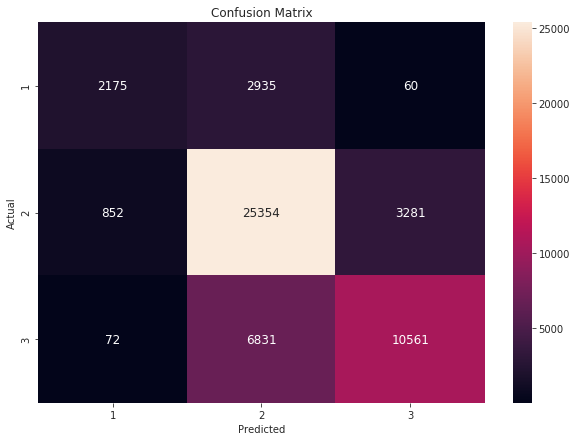

In [ ]:
y_pred = rf.predict(X_test)

data = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.show()

## **Feature Importance**

In [ ]:
results = list(zip(X, rf.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
importance

Feature  Importance
0                           geo_level_1_id    0.369312
1                           geo_level_2_id    0.189583
33                       foundation_type_r    0.105481
2                           geo_level_3_id    0.089801
4                                      age    0.040313
5                          area_percentage    0.031592
8      has_superstructure_mud_mortar_stone    0.028406
6                        height_percentage    0.022040
42                      other_floor_type_q    0.015556
32                       foundation_type_i    0.012786
12  has_superstructure_cement_mortar_brick    0.009533
36                             roof_type_q    0.009214
3                      count_floors_pre_eq    0.009093
13               has_superstructure_timber    0.008637
9            has_superstructure_stone_flag    0.005843
11     has_superstructure_mud_mortar_brick    0.005385
31                land_surface_condition_t    0.004529
19                       has_secondary_use    0.004253
40                     ground_floor_type_x    0.004109
18                          count_families    0.004047
46                              position_s    0.003662
44                      other_floor_type_x    0.003333
7             has_superstructure_adobe_mud    0.002597
14               has_superstructure_bamboo    0.002545
37                             roof_type_x    0.001704
15    has_superstructure_rc_non_engineered    0.001615
39                     ground_floor_type_v    0.001493
47                              position_t    0.001477
20           has_secondary_use_agriculture    0.001477
30                land_surface_condition_o    0.001470
35                       foundation_type_w    0.001451
17                has_superstructure_other    0.001263
34                       foundation_type_u    0.001053
59                legal_ownership_status_w    0.000998
16        has_superstructure_rc_engineered    0.000869
58                legal_ownership_status_v    0.000853
29                 has_secondary_use_other    0.000536
10  has_superstructure_cement_mortar_stone    0.000497
49                    plan_configuration_d    0.000477
43                      other_floor_type_s    0.000335
21                 has_secondary_use_hotel    0.000266
54                    plan_configuration_q    0.000221
45                              position_o    0.000094
56                    plan_configuration_u    0.000073
22                has_secondary_use_rental    0.000069
41                     ground_floor_type_z    0.000059
57                legal_ownership_status_r    0.000001
52                    plan_configuration_n    0.000000
27            has_secondary_use_gov_office    0.000000
55                    plan_configuration_s    0.000000
53                    plan_configuration_o    0.000000
24                has_secondary_use_school    0.000000
51                    plan_configuration_m    0.000000
50                    plan_configuration_f    0.000000
38                     ground_floor_type_m    0.000000
26           has_secondary_use_health_post    0.000000
28            has_secondary_use_use_police    0.000000
25              has_secondary_use_industry    0.000000
23           has_secondary_use_institution    0.000000
48                    plan_configuration_c    0.000000

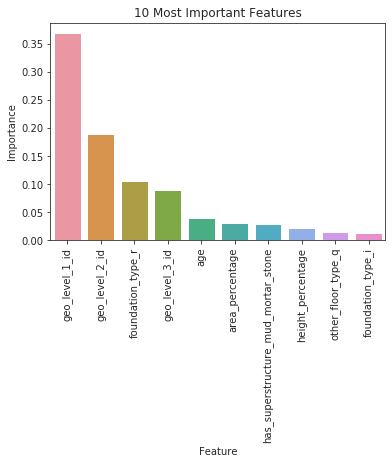

In [ ]:
importance_10 = importance.head(10)
plot = sns.barplot(x=importance_10["Feature"], y=importance_10["Importance"])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title("10 Most Important Features")
plt.show()

From the previous plot we can conclude that the geographic region (geo_level_1_id, geo_level_2_id, geo_level_3_id) in which a building exists, and the foundation type "r" are the most important features to determine the damage grade that a building will suffer during an earthquake.

## **Output File**

In [ ]:
test_building_id = test_values["building_id"]
test_values.drop(columns = ["building_id"], inplace=True)

#Outliers
test_values["age"] = winsorize(test_values["age"],(0, 0.05))
test_values["area_percentage"] = winsorize(test_values["area_percentage"],(0, 0.055))
test_values["height_percentage"] = winsorize(test_values["height_percentage"],(0, 0.04))

#Dummies
test_values = pd.get_dummies(test_values, drop_first = True)

#Predictions
predictions = rf.predict(test_values)

#Create Submission File
submission = pd.DataFrame()
submission["building_id"] = test_building_id
submission["damage_grade"] = predictions
submission.head()
submission.to_csv("submission.csv", index=False)

In [ ]:
predictions = rf.predict(test_values)

In [ ]:
submission = pd.DataFrame()
submission["building_id"] = test_building_id
submission["damage_grade"] = predictions
submission.head()
submission.to_csv("submission.csv", index=False)

<a href="submission.csv"> Download File </a>